In [1]:
#Using Imports to ensure code can be read correctly with the correct libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#uploading file for review and to begin data cleaning whilst using class notes taufique M (2025) 

In [4]:
#review first few lines to preview the data set. uploaded csv file to files on jupyter
df = pd.read_csv('Salary_Survey.csv', low_memory=False)
df.head(10)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,...,8 - 10 years,2 - 4 years,Master's degree,Man,NaN,NaN,NaN,NaN,NaN,NaN
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,"33,000",2000.0,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT","50,000",NaN,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Man,NaN,NaN,NaN,NaN,NaN,NaN
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,"112,000",10000.0,USD,NaN,NaN,...,21 - 30 years,21 - 30 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,"45,000",0.0,USD,NaN,I work for a Charter School,...,21 - 30 years,21 - 30 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#reviewing first ten rows i can see many NaN sections with no values and rows that need to be removed. for the purpose of this assignment, I am removing the currency section also as salaries will be referenced in euro due to class advising it is causing too many errors.

In [6]:
df.shape, df.columns.tolist()

((28178, 23),
 ['Timestamp',
  'How old are you?',
  'What industry do you work in?',
  'Job title',
  'If your job title needs additional context, please clarify here:',
  "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)",
  'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
  'Please indicate the currency',
  'If "Other," please indicate the currency here: ',
  'If your income needs additional context, please provide it here:',
  'What country do you work in?',
  "If you're in the U.S., what state do you work in?",
  'What city do you work in?',
  'How many years of professional work experience do you have overall?',
  'How many years of professional work experience

In [7]:
#need to drop rows 
for c in df.select_dtypes(include='object').columns:
    df[c].apply(lambda v: np.nan if (isinstance(v, str) and v.strip()=='') else v)
    df = df.dropna(how='all')

In [8]:
#dropping salary curency row: 
df=df.drop(columns=["Please indicate the currency"])
df=df.drop(columns=["Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22"])

In [9]:

#rechecking this was dropped
print(df.head(10))

            Timestamp How old are you?  What industry do you work in?  \
0  4/27/2021 11:02:10            25-34   Education (Higher Education)   
1  4/27/2021 11:02:22            25-34              Computing or Tech   
2  4/27/2021 11:02:38            25-34  Accounting, Banking & Finance   
3  4/27/2021 11:02:41            25-34                     Nonprofits   
4  4/27/2021 11:02:42            25-34  Accounting, Banking & Finance   
5  4/27/2021 11:02:46            25-34   Education (Higher Education)   
6  4/27/2021 11:02:51            25-34                     Publishing   
7  4/27/2021 11:03:00            25-34  Education (Primary/Secondary)   
8  4/27/2021 11:03:01            45-54              Computing or Tech   
9  4/27/2021 11:03:02            35-44  Accounting, Banking & Finance   

                                  Job title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3       

In [10]:
#need to check the raw data for EDA or outliers 
col_salary = [c for c in df.columns if 'annual salary' in c.lower()]
col_bonus = [c for c in df.columns if 'additional monetary compensation' in c.lower()]
if col_salary:
    sc = col_salary[0]
    df[sc] = (df[sc].astype(str)
    .str.replace(',','', regex=False)
    .str.replace(r'[^\d\.\-]','', regex=True))
df[sc] = pd.to_numeric(df[sc], errors='coerce')
if col_bonus:
    bc = col_bonus[0]
    df[bc] = (df[bc].astype(str)
    .str.replace(',','', regex=False)
    .str.replace(r'[^\d\.\-]','', regex=True))
df[bc] = pd.to_numeric(df[bc], errors='coerce')

In [12]:
df.head(4)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.","If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman


In [17]:
dup_before = df.duplicated() .sum()
df = df.drop_duplicates(keep='first')
dup_after = df.duplicated() .sum()
salary_cols = [c for c in df.columns if 'salary' in c.lower()]
if salary_cols:
    sc = salary_cols[0]
    q1 = df[sc].quantile(0.25); q3 = df[sc].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr; upper = q3 + 1.5*iqr
    n_before = df.shape[0]
    df = df[(df[sc].isna()) | ((df[sc] >=lower) & (df[sc] <= upper))]
    n_after = df.shape[0]
    dup_before, dup_after, n_before, n_after
    n_after = df.shape[0]
    

In [18]:
df.describe(include='all')
df.isnull() .sum() .sort_values(ascending=False)

If "Other," please indicate the currency here:                                                                                                                                                                                          26786
If your income needs additional context, please provide it here:                                                                                                                                                                        24098
If your job title needs additional context, please clarify here:                                                                                                                                                                        19894
How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.                                           7053
If you're in the U.S., what state do you work in

In [23]:
print("Duplicates before removal:",df.duplicated().sum())
df= df.drop_duplicates()
print(df.duplicated().sum())

Duplicates before removal: 0
0


In [25]:
print("outliers removed. Remaining rows:",
len(df))

outliers removed. Remaining rows: 26898


In [ ]:
#Originally we had 28178 - 26898 = 1280 outliers removed from the dataset to clean it up. 

In [27]:
df.to_csv('Cleaned_Salary_Survey.csv',
          index=False)

In [31]:
from IPython.display import FileLink

FileLink('Cleaned_Salary_Survey.csv')

C:\Users\catha\Cleaned_Salary_Survey.csv

In [32]:
df.head(20)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.","If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000,2000.0,NaN,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000,NaN,NaN,NaN,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000,10000.0,NaN,NaN,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000,0.0,NaN,I work for a Charter School,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman


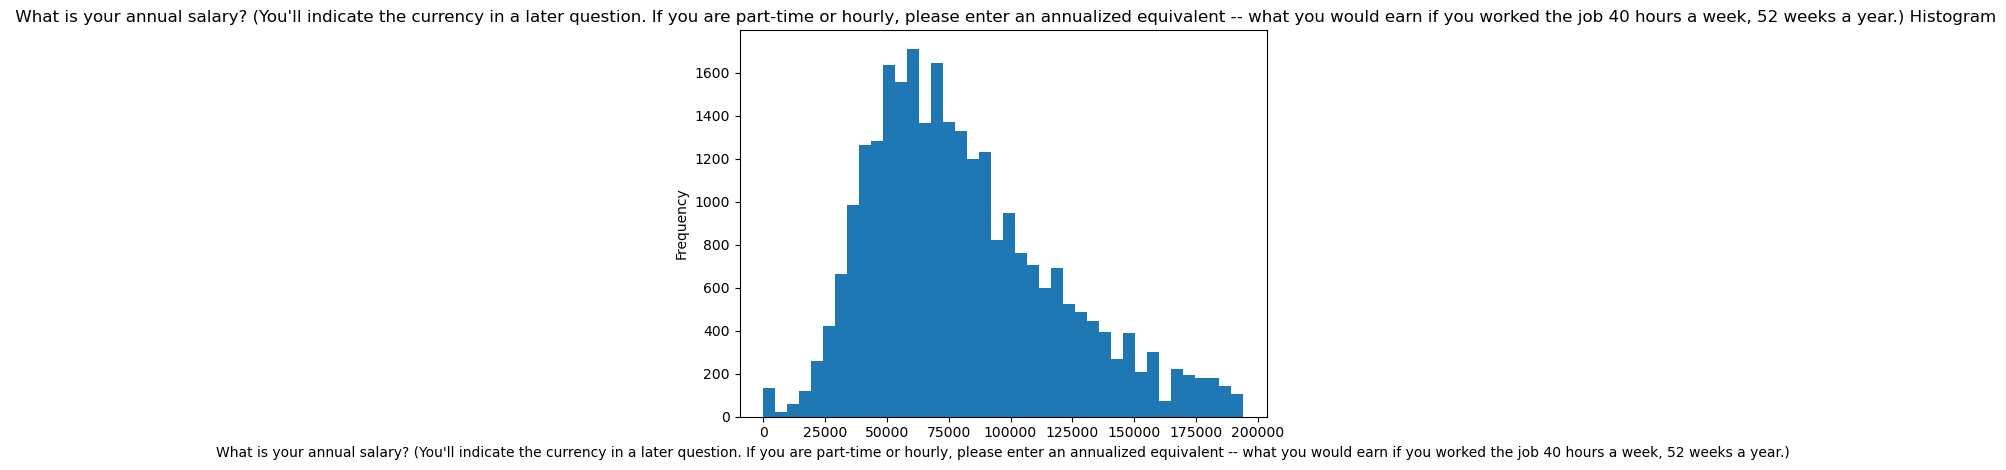

In [37]:
salary_cols = [c for c in df.columns if 'salary' in c.lower()]
if salary_cols:
    sc = salary_cols[0]

plt.figure()
df[sc].dropna() .plot(kind='hist', bins=40, title=f' {sc} Histogram')
plt.xlabel(sc)
plt.tight_layout()
plt.show()

In [ ]:
#going to create box plot for spread of the outliers distribution

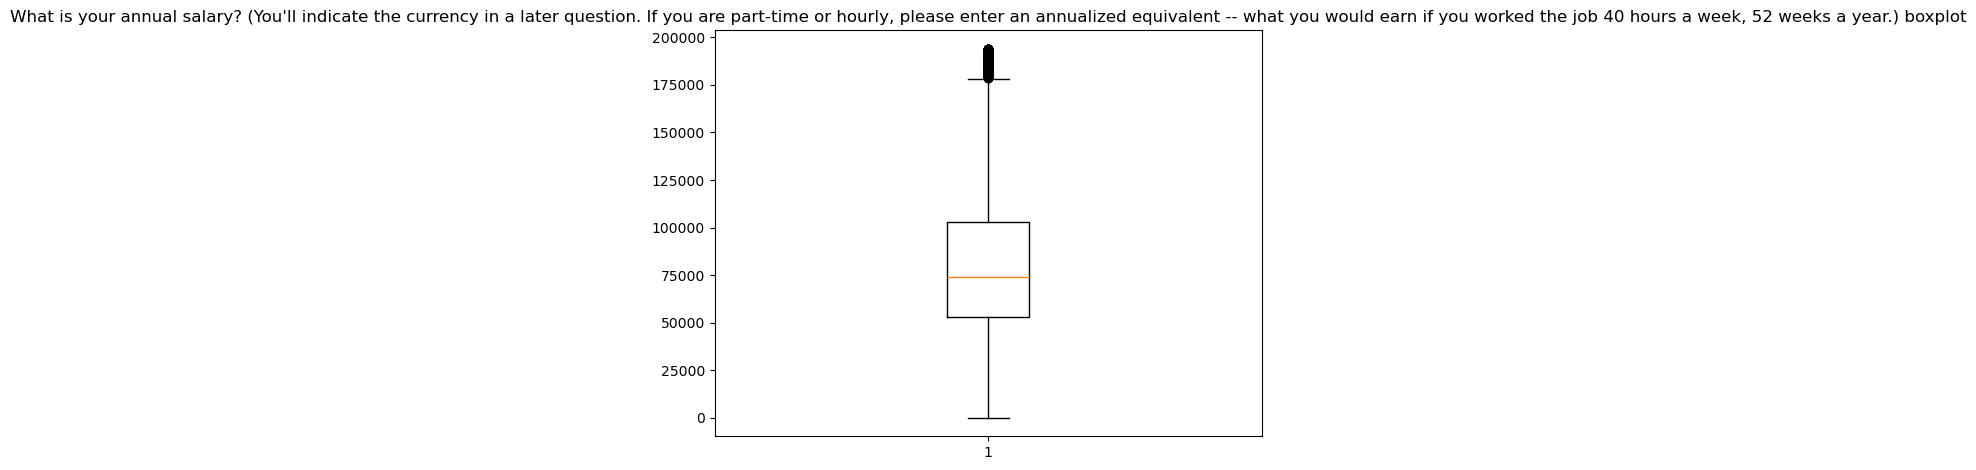

In [46]:
plt.figure()
plt.boxplot(df[sc].dropna(), vert=True)
plt.title(f'{sc} boxplot')
plt.tight_layout()
plt.show()
